In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Loading dataset
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove "MYPOPIC" column from dataset
df = df.drop("MYOPIC", axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Standardize the dataset
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [5]:
# perform dimentionality reduction with PCA

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
myopic_pca = pca.fit_transform(df_scaled)
myopic_pca.shape

# Dataset reduced from 14 features to 10

(618, 10)

In [6]:
# calculate the explained variance
pca.explained_variance_ratio_

# 10 principal components provide 91% of the original dataset

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [8]:
# Transform PCA data to a DataFrame
df_myopic_pca = pd.DataFrame(
    data=myopic_pca, 
    columns=["principal component 1", 
             "principal component 2",
             "principal component 3",
             "principal component 4",
             "principal component 5",
             "principal component 6",
             "principal component 7",
             "principal component 8",
             "principal component 9",
             "principal component 10",
            ]
)
df_myopic_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [9]:
# Further reduce dataset dimensions with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopic_pca)
tsne_features.shape

C:\Users\Master Console\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

In [10]:
# Transform TSNA data to a DataFrame
df_myopic_tsna = pd.DataFrame(
    data=tsne_features, 
    columns=["principal component 1", 
             "principal component 2"]
)
df_myopic_tsna.head()

,principal component 1,principal component 2
0,2.766917,16.011963
1,-1.946652,10.903520
2,13.690946,-11.948645
3,-5.837887,-25.119730
4,-8.821235,22.023409


In [11]:
# Prepare to plot the TSNA dataset

df_myopic_tsna['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopic_tsna['y'] = tsne_features[:,1]

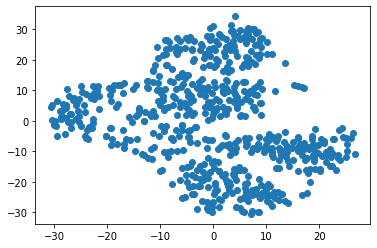

In [12]:
# Visualize the clusters
plt.scatter(df_myopic_tsna['x'], df_myopic_tsna['y'])
plt.show()

# Appears to be 4 or 5 clusters

In [13]:
# Identify the best number of clusters using the elbow curve
#  inertia values
inertia = []

# array of k values or loop through a range of k values
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# loop through the values of k
for value in k:
    #first call teh KMeans function to fit model on the data
    model = KMeans(n_clusters = value, random_state=42)
    # second, fit the model onto the iris data
    model.fit(df_myopic_tsna)
    # third, calculate the inertia, grab the inertia property (.inertia_) and add to the array of inertia values
    inertia.append(model.inertia_)
    
# prep the data to be plotted
elbowData = {
    "k": k,
    "inertia": inertia
}

# convert to a DataFrame
elbowDataDF = pd.DataFrame(elbowData)

elbowDataDF.head(10)

C:\Users\Master Console\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,510007.218750
1,2,243860.875000
2,3,145092.625000
3,4,109324.585938
4,5,79493.265625
5,6,63621.570312
6,7,53587.417969
7,8,47588.378906
8,9,41719.792969
9,10,36682.519531


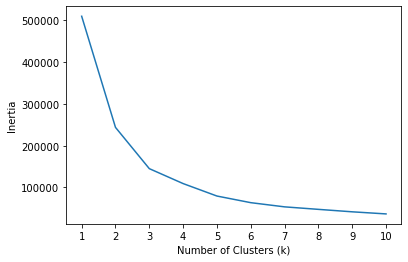

In [14]:
# Plot the elbow curve to find the best candidate(s) for k

plt.plot(elbowDataDF['k'], elbowDataDF['inertia'])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Appears to be 3 or 4 groups of data

In [ ]:
I recomend this data for use. Patients can be broken into small groups.